In [1]:
import pandas as pd
import requests
import plotly.graph_objects as go
import numpy as np
import GMX_data as gmx

浮动币 ： ['UNI', 'LINK', 'ETH', 'WBTC']

In [2]:
symbol = gmx.get_token()
actions = gmx.get_actions()
end_day = '202370200'
glp = gmx.get_glp(end_day)
fee = gmx.get_fee(end_day)
prc = gmx.get_fast_price(symbol,end_day,token_list = ['ETH',"WBTC"])
result,fig,data = gmx.show_case(glp,fee,prc,0.833473)

apy:  0.3004538177116699
sharpe:  3.3185732116373896
max drawdown:  -0.05409296644023742 end at:  2023-03-11 07:00:00


In [3]:
glp = gmx.get_glp(end_day)
fee = gmx.get_fee(end_day)
prc = gmx.get_fast_price(symbol,end_day,token_list = ['ETH',"WBTC"])
result,fig,data = gmx.show_case(glp,fee,prc,1 / 0.833473)

apy:  0.27686870514303924
sharpe:  4.4174281366904715
max drawdown:  -0.03804523307848262 end at:  2023-03-11 07:00:00


In [4]:
import plotly.io as pio
pio.renderers.default = "browser"
fig.show()

<AxesSubplot:title={'center':'GLP price'}, xlabel='time'>

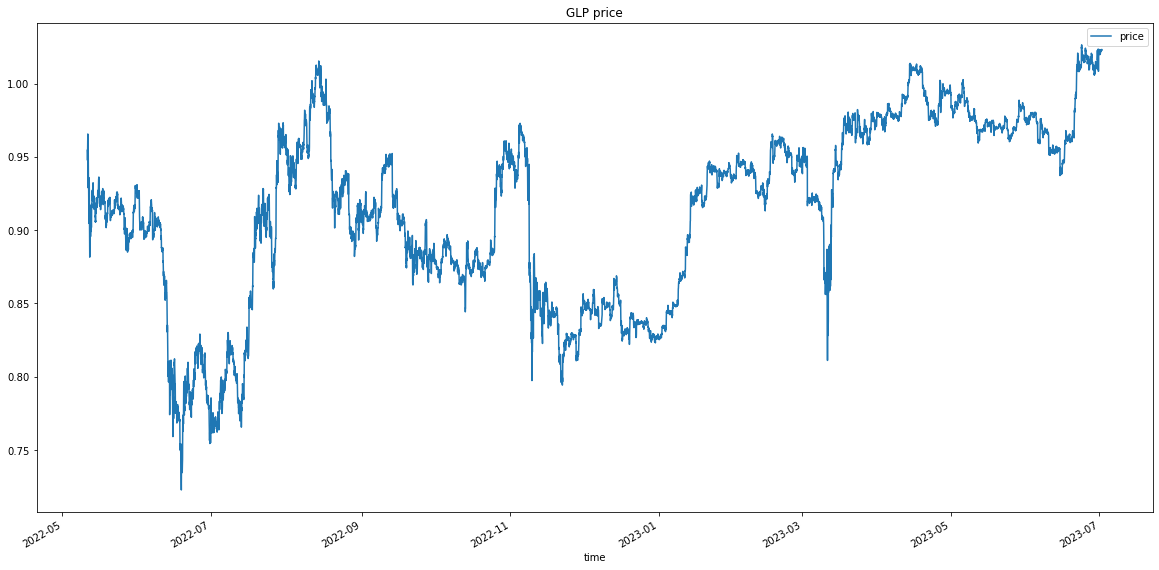

In [5]:
# glp price
glp.plot(x = 'time',y = 'price',figsize = (20,10),title = 'GLP price')

In [6]:
result['hedge_value'] = result['eth_value'] + result['wbtc_value']
result[['glp_value','eth_value','wbtc_value','hedge_value']].corr()

,glp_value,eth_value,wbtc_value,hedge_value
glp_value,1.000000,-0.902978,-0.734140,-0.833473
eth_value,-0.902978,1.000000,0.890422,0.966607
wbtc_value,-0.734140,0.890422,1.000000,0.977322
hedge_value,-0.833473,0.966607,0.977322,1.000000


In [7]:
result.shape

(9996, 12)

In [10]:
# 获得3月11和3月12日的数据
cut_start = pd.to_datetime('2023-03-11 00:00:00',format = '%Y-%m-%d %H:%M:%S')
cut_end = pd.to_datetime('2023-03-12 00:00:00',format = '%Y-%m-%d %H:%M:%S')
data_cut = data[(data['time'] >= cut_start) & (data['time'] <= cut_end)]
data_cut

,id,aumInUsdg,glpSupply,__typename_x,time,price,margin,marginAndLiquidation,swap,mint,burn,__typename_y,value.eth,value.wbtc,total,liquidation
7284,1678492800,0.000447,5.104572e+08,HourlyGlpStat,2023-03-11 00:00:00,0.875737,41617.686953,41619.188929,13098.40928,47.72617,3953.090498,HourlyFee,1441.8,20303.0,58718.414877,1.501976
7285,1678496400,0.000443,5.015742e+08,HourlyGlpStat,2023-03-11 01:00:00,0.883237,69736.280378,70190.702753,23815.346041,40.599182,26113.069833,HourlyFee,1479.73,20778.4,120159.717809,454.422375
7286,1678500000,0.000443,4.990252e+08,HourlyGlpStat,2023-03-11 02:00:00,0.886918,22687.725549,22690.82,7183.385775,6.267868,6610.286951,HourlyFee,1478.12,20704.7,36490.760593,3.094451
7287,1678503600,0.000424,4.949165e+08,HourlyGlpStat,2023-03-11 03:00:00,0.856043,13581.949259,13593.365686,7000.295587,6.290059,9018.290793,HourlyFee,1464.2,20498.0,29618.242125,11.416427
7288,1678507200,0.00042,4.906405e+08,HourlyGlpStat,2023-03-11 04:00:00,0.856635,14068.452253,14069.952253,9350.17758,307.841045,9951.04602,HourlyFee,1464.8,20402.0,33679.016898,1.5
7289,1678510800,0.000418,4.892942e+08,HourlyGlpStat,2023-03-11 05:00:00,0.853803,5377.810858,5377.810858,13401.596643,108.308981,4034.927794,HourlyFee,1467.8,20471.0,22922.644277,0.0
7290,1678514400,0.000402,4.801455e+08,HourlyGlpStat,2023-03-11 06:00:00,0.836305,8924.346532,8929.317663,10832.942957,56.403908,18214.605365,HourlyFee,1462.6,20366.0,38033.269893,4.971131
7291,1678518000,0.000384,4.729823e+08,HourlyGlpStat,2023-03-11 07:00:00,0.811129,22695.831737,22980.856082,4613.534551,193.514805,17287.938755,HourlyFee,1424.58,19969.0,45075.844193,285.024344
7292,1678521600,0.000395,4.708214e+08,HourlyGlpStat,2023-03-11 08:00:00,0.838819,18179.963089,18443.554785,1493.291439,203.561855,6783.098962,HourlyFee,1439.9,20161.0,26923.507041,263.591696
7293,1678525200,0.000412,4.694899e+08,HourlyGlpStat,2023-03-11 09:00:00,0.876941,4999.946194,4999.946194,1053.364181,8.469145,3416.037502,HourlyFee,1442.2,20183.0,9477.817021,0.0
